## P.S. The main idea behind this notebook is inspired from FabienDaniel Kernel Elo_world.
https://www.kaggle.com/fabiendaniel/elo-world

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import KFold
import warnings
import time
import sys
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import BayesianRidge
warnings.simplefilter(action='ignore', category=FutureWarning)
import gc
import feather

In [4]:
train = feather.read_dataframe('train')
test = feather.read_dataframe('test')
target = pd.read_csv('target2',header=None,index_col=0)

In [32]:
features = [c for c in train.columns if c not in ['card_id', 'first_active_month']]
categorical_feats = [c for c in features if 'feature_' in c]

## LightGBM

In [33]:
param = {'num_leaves': 31,
         'min_data_in_leaf': 32, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.005,
         "min_child_samples": 20,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9 ,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.1,
         "nthread": 4,
         "verbosity": -1}

In [34]:
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(train))
predictions = np.zeros(len(test))
start = time.time()
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features], label=target.iloc[trn_idx], categorical_feature=categorical_feats)
    val_data = lgb.Dataset(train.iloc[val_idx][features], label=target.iloc[val_idx], categorical_feature=categorical_feats)

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 200)
    oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(mean_squared_error(oof, target)**0.5))

fold n°0


C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 3.73445	valid_1's rmse: 3.80542
[200]	training's rmse: 3.67046	valid_1's rmse: 3.77166
[300]	training's rmse: 3.62425	valid_1's rmse: 3.75507
[400]	training's rmse: 3.58727	valid_1's rmse: 3.74526
[500]	training's rmse: 3.5566	valid_1's rmse: 3.73854
[600]	training's rmse: 3.53026	valid_1's rmse: 3.73289
[700]	training's rmse: 3.50796	valid_1's rmse: 3.72904
[800]	training's rmse: 3.48843	valid_1's rmse: 3.72594
[900]	training's rmse: 3.47109	valid_1's rmse: 3.72388
[1000]	training's rmse: 3.45459	valid_1's rmse: 3.72177
[1100]	training's rmse: 3.43938	valid_1's rmse: 3.72029
[1200]	training's rmse: 3.42514	valid_1's rmse: 3.71925
[1300]	training's rmse: 3.4112	valid_1's rmse: 3.71836
[1400]	training's rmse: 3.39767	valid_1's rmse: 3.71751
[1500]	training's rmse: 3.38508	valid_1's rmse: 3.71671
[1600]	training's rmse: 3.37298	valid_1's rmse: 3.71608
[1700]	training's rmse: 3.36097	valid_1's rmse: 3.71

C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 3.75235	valid_1's rmse: 3.7331
[200]	training's rmse: 3.68716	valid_1's rmse: 3.70157
[300]	training's rmse: 3.64004	valid_1's rmse: 3.68585
[400]	training's rmse: 3.60313	valid_1's rmse: 3.67641
[500]	training's rmse: 3.57213	valid_1's rmse: 3.67034
[600]	training's rmse: 3.54646	valid_1's rmse: 3.66554
[700]	training's rmse: 3.52371	valid_1's rmse: 3.66212
[800]	training's rmse: 3.5039	valid_1's rmse: 3.65905
[900]	training's rmse: 3.48623	valid_1's rmse: 3.65702
[1000]	training's rmse: 3.47037	valid_1's rmse: 3.65504
[1100]	training's rmse: 3.455	valid_1's rmse: 3.65341
[1200]	training's rmse: 3.44057	valid_1's rmse: 3.65216
[1300]	training's rmse: 3.42722	valid_1's rmse: 3.6512
[1400]	training's rmse: 3.41396	valid_1's rmse: 3.65039
[1500]	training's rmse: 3.40146	valid_1's rmse: 3.64963
[1600]	training's rmse: 3.38894	valid_1's rmse: 3.64911
[1700]	training's rmse: 3.37738	valid_1's rmse: 3.64833

C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 3.75721	valid_1's rmse: 3.70929
[200]	training's rmse: 3.69228	valid_1's rmse: 3.67858
[300]	training's rmse: 3.64581	valid_1's rmse: 3.66447
[400]	training's rmse: 3.6103	valid_1's rmse: 3.65644
[500]	training's rmse: 3.5795	valid_1's rmse: 3.65063
[600]	training's rmse: 3.55381	valid_1's rmse: 3.64535
[700]	training's rmse: 3.5315	valid_1's rmse: 3.64111
[800]	training's rmse: 3.51183	valid_1's rmse: 3.63868
[900]	training's rmse: 3.49413	valid_1's rmse: 3.63628
[1000]	training's rmse: 3.47744	valid_1's rmse: 3.63433
[1100]	training's rmse: 3.46195	valid_1's rmse: 3.63318
[1200]	training's rmse: 3.44652	valid_1's rmse: 3.63216
[1300]	training's rmse: 3.43318	valid_1's rmse: 3.63107
[1400]	training's rmse: 3.41929	valid_1's rmse: 3.63032
[1500]	training's rmse: 3.40617	valid_1's rmse: 3.62975
[1600]	training's rmse: 3.39353	valid_1's rmse: 3.6292
[1700]	training's rmse: 3.38126	valid_1's rmse: 3.6287

C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 3.70646	valid_1's rmse: 3.90987
[200]	training's rmse: 3.64108	valid_1's rmse: 3.87582
[300]	training's rmse: 3.59483	valid_1's rmse: 3.8601
[400]	training's rmse: 3.55884	valid_1's rmse: 3.8506
[500]	training's rmse: 3.52809	valid_1's rmse: 3.84382
[600]	training's rmse: 3.50215	valid_1's rmse: 3.83826
[700]	training's rmse: 3.48046	valid_1's rmse: 3.8346
[800]	training's rmse: 3.46077	valid_1's rmse: 3.8316
[900]	training's rmse: 3.4429	valid_1's rmse: 3.82956
[1000]	training's rmse: 3.42639	valid_1's rmse: 3.82783
[1100]	training's rmse: 3.41109	valid_1's rmse: 3.8263
[1200]	training's rmse: 3.39614	valid_1's rmse: 3.82493
[1300]	training's rmse: 3.38186	valid_1's rmse: 3.82395
[1400]	training's rmse: 3.36847	valid_1's rmse: 3.82332
[1500]	training's rmse: 3.35555	valid_1's rmse: 3.82297
[1600]	training's rmse: 3.34275	valid_1's rmse: 3.82249
[1700]	training's rmse: 3.33059	valid_1's rmse: 3.82185


C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[100]	training's rmse: 3.75318	valid_1's rmse: 3.72058
[200]	training's rmse: 3.68689	valid_1's rmse: 3.69154
[300]	training's rmse: 3.6394	valid_1's rmse: 3.67826
[400]	training's rmse: 3.60257	valid_1's rmse: 3.67024
[500]	training's rmse: 3.57169	valid_1's rmse: 3.66472
[600]	training's rmse: 3.54475	valid_1's rmse: 3.66016
[700]	training's rmse: 3.52249	valid_1's rmse: 3.65644
[800]	training's rmse: 3.50281	valid_1's rmse: 3.6531
[900]	training's rmse: 3.48517	valid_1's rmse: 3.6511
[1000]	training's rmse: 3.46871	valid_1's rmse: 3.64906
[1100]	training's rmse: 3.45336	valid_1's rmse: 3.64766
[1200]	training's rmse: 3.43819	valid_1's rmse: 3.64633
[1300]	training's rmse: 3.42505	valid_1's rmse: 3.64527
[1400]	training's rmse: 3.41122	valid_1's rmse: 3.64438
[1500]	training's rmse: 3.39847	valid_1's rmse: 3.64323
[1600]	training's rmse: 3.38622	valid_1's rmse: 3.64262
[1700]	training's rmse: 3.37447	valid_1's rmse: 3.642

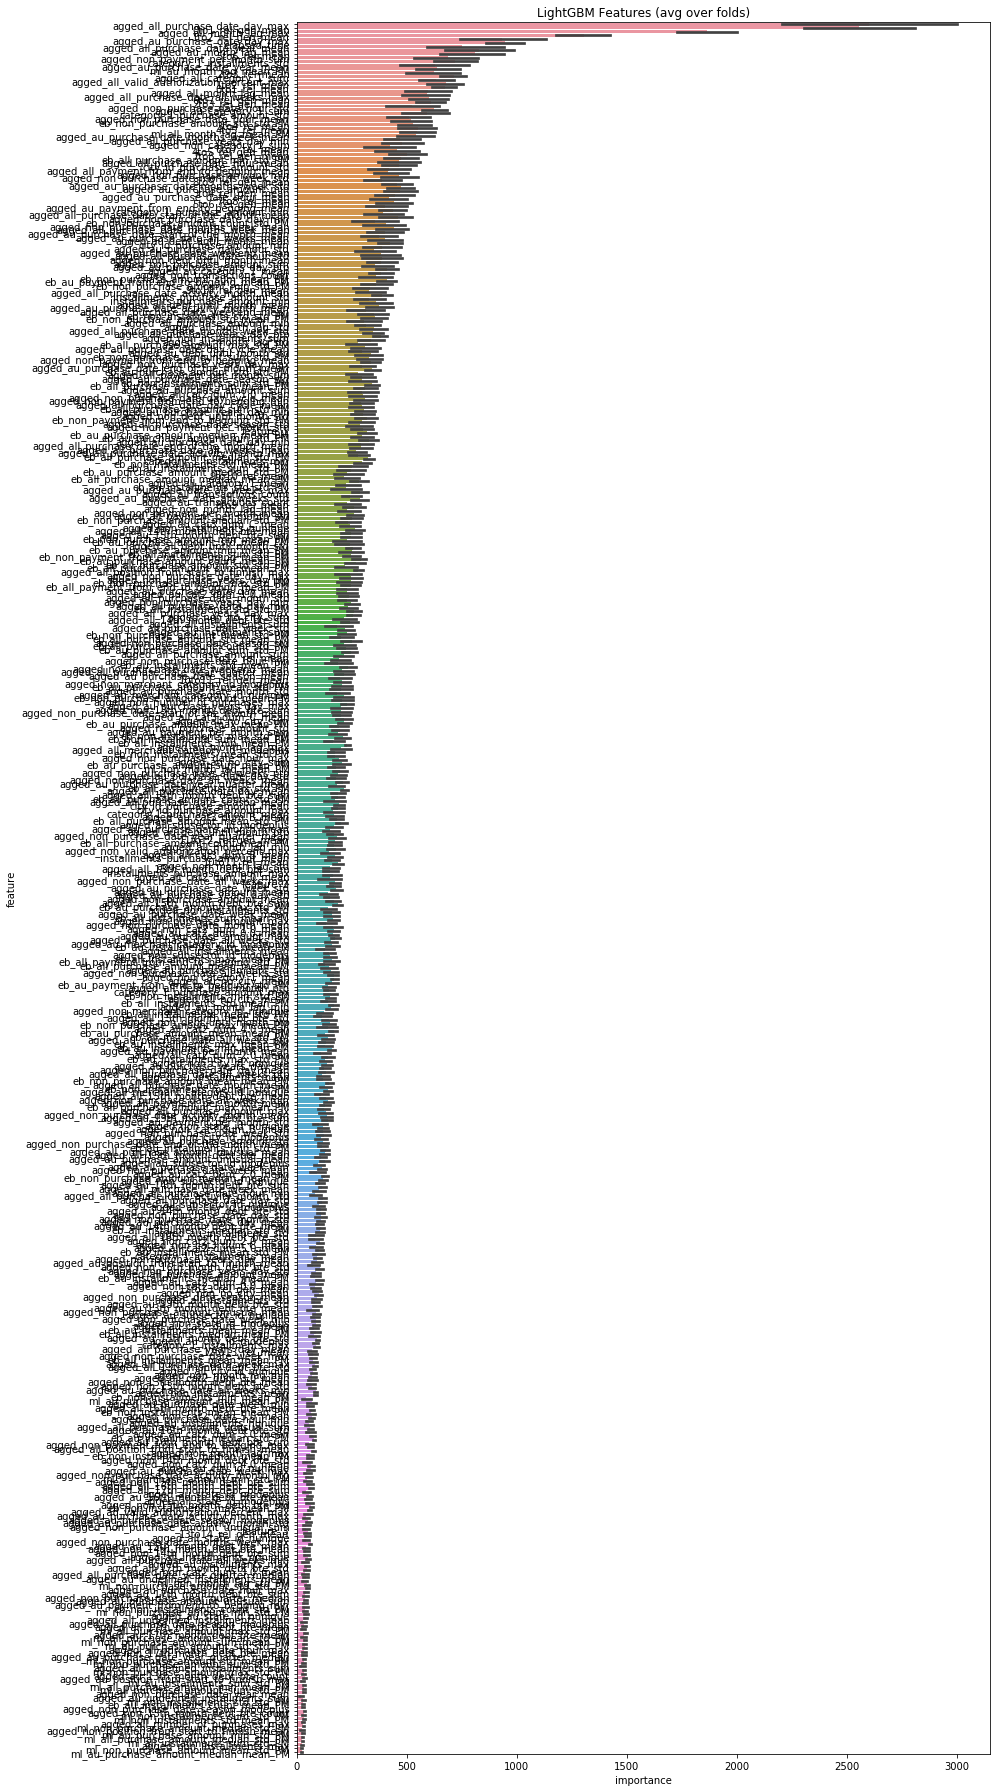

In [35]:
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,25))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

## LightGBM-1 with Repeated kfold approach

#### RepeatedKFold repeats K-Fold n times. It can be used when one requires to run KFold n times, producing different splits in each repetition.

In [36]:
lgbparam = {'num_leaves': 31,
            'boosting_type': 'rf',
             'min_data_in_leaf': 30, 
             'objective':'regression',
             'max_depth': -1,
             'learning_rate': 0.01,
             "min_child_samples": 20,
             "boosting": "gbdt",
             "feature_fraction": 0.9,
             "bagging_freq": 1,
             "bagging_fraction": 0.9 ,
             "bagging_seed": 11,
             "metric": 'rmse',
             "lambda_l1": 0.1,
             "verbosity": -1,
             "nthread": 4,
             "random_state": 4590}

In [37]:
from sklearn.model_selection import RepeatedKFold
folds = RepeatedKFold(n_splits=5, n_repeats=2, random_state=4520)

oof_lgb = np.zeros(len(train))
predictions_lgb = np.zeros(len(test))
start = time.time()
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(train.iloc[trn_idx][features], label=target.iloc[trn_idx], categorical_feature=categorical_feats)
    val_data = lgb.Dataset(train.iloc[val_idx][features], label=target.iloc[val_idx], categorical_feature=categorical_feats)

    num_round = 11000
    clf = lgb.train(lgbparam, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=100, early_stopping_rounds = 100)
    oof_lgb[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions_lgb += clf.predict(test[features], num_iteration=clf.best_iteration) / (5 * 2)

print("CV score: {:<8.5f}".format(mean_squared_error(oof_lgb, target)**0.5))

fold n°0


C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.66907	valid_1's rmse: 3.75813
[200]	training's rmse: 3.58405	valid_1's rmse: 3.73674
[300]	training's rmse: 3.52593	valid_1's rmse: 3.72759
[400]	training's rmse: 3.48335	valid_1's rmse: 3.72187
[500]	training's rmse: 3.44956	valid_1's rmse: 3.71826
[600]	training's rmse: 3.41872	valid_1's rmse: 3.71619
[700]	training's rmse: 3.39194	valid_1's rmse: 3.71471
[800]	training's rmse: 3.3662	valid_1's rmse: 3.71316
[900]	training's rmse: 3.34042	valid_1's rmse: 3.71208
[1000]	training's rmse: 3.31642	valid_1's rmse: 3.71181
[1100]	training's rmse: 3.29359	valid_1's rmse: 3.71165
Early stopping, best iteration is:
[1084]	training's rmse: 3.2971	valid_1's rmse: 3.7113
fold n°1


C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.70309	valid_1's rmse: 3.62018
[200]	training's rmse: 3.62082	valid_1's rmse: 3.59521
[300]	training's rmse: 3.56214	valid_1's rmse: 3.58364
[400]	training's rmse: 3.52044	valid_1's rmse: 3.57714
[500]	training's rmse: 3.48464	valid_1's rmse: 3.5726
[600]	training's rmse: 3.45357	valid_1's rmse: 3.57009
[700]	training's rmse: 3.42581	valid_1's rmse: 3.56812
[800]	training's rmse: 3.39937	valid_1's rmse: 3.56677
[900]	training's rmse: 3.37507	valid_1's rmse: 3.56611
[1000]	training's rmse: 3.35276	valid_1's rmse: 3.56531
[1100]	training's rmse: 3.33059	valid_1's rmse: 3.56464
[1200]	training's rmse: 3.3098	valid_1's rmse: 3.56445
[1300]	training's rmse: 3.28907	valid_1's rmse: 3.56371
[1400]	training's rmse: 3.26802	valid_1's rmse: 3.56327
Early stopping, best iteration is:
[1388]	training's rmse: 3.27034	valid_1's rmse: 3.56317
fold n°2


C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.63535	valid_1's rmse: 3.90378
[200]	training's rmse: 3.55225	valid_1's rmse: 3.87795
[300]	training's rmse: 3.4958	valid_1's rmse: 3.86623
[400]	training's rmse: 3.4533	valid_1's rmse: 3.85948
[500]	training's rmse: 3.4198	valid_1's rmse: 3.85545
[600]	training's rmse: 3.38957	valid_1's rmse: 3.85254
[700]	training's rmse: 3.36206	valid_1's rmse: 3.85056
[800]	training's rmse: 3.33684	valid_1's rmse: 3.84867
[900]	training's rmse: 3.31246	valid_1's rmse: 3.84827
[1000]	training's rmse: 3.29024	valid_1's rmse: 3.84725
[1100]	training's rmse: 3.26715	valid_1's rmse: 3.84665
[1200]	training's rmse: 3.24551	valid_1's rmse: 3.84639
[1300]	training's rmse: 3.22344	valid_1's rmse: 3.84565
[1400]	training's rmse: 3.20249	valid_1's rmse: 3.84547
[1500]	training's rmse: 3.18208	valid_1's rmse: 3.845
[1600]	training's rmse: 3.16272	valid_1's rmse: 3.84477
[1700]	training's rmse: 3.14506	valid_1's rmse: 3.84466

C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.67873	valid_1's rmse: 3.73342
[200]	training's rmse: 3.59255	valid_1's rmse: 3.71044
[300]	training's rmse: 3.53506	valid_1's rmse: 3.69815
[400]	training's rmse: 3.49337	valid_1's rmse: 3.69139
[500]	training's rmse: 3.45809	valid_1's rmse: 3.68716
[600]	training's rmse: 3.42715	valid_1's rmse: 3.68457
[700]	training's rmse: 3.39822	valid_1's rmse: 3.6833
[800]	training's rmse: 3.3727	valid_1's rmse: 3.68142
[900]	training's rmse: 3.34824	valid_1's rmse: 3.68051
[1000]	training's rmse: 3.32524	valid_1's rmse: 3.67996
[1100]	training's rmse: 3.30257	valid_1's rmse: 3.67953
[1200]	training's rmse: 3.28092	valid_1's rmse: 3.6795
Early stopping, best iteration is:
[1149]	training's rmse: 3.29176	valid_1's rmse: 3.6791
fold n°4


C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.68596	valid_1's rmse: 3.69886
[200]	training's rmse: 3.60282	valid_1's rmse: 3.67572
[300]	training's rmse: 3.54564	valid_1's rmse: 3.66155
[400]	training's rmse: 3.50388	valid_1's rmse: 3.65392
[500]	training's rmse: 3.47077	valid_1's rmse: 3.64845
[600]	training's rmse: 3.4403	valid_1's rmse: 3.64474
[700]	training's rmse: 3.41345	valid_1's rmse: 3.64289
[800]	training's rmse: 3.38818	valid_1's rmse: 3.64086
[900]	training's rmse: 3.36329	valid_1's rmse: 3.63883
[1000]	training's rmse: 3.34059	valid_1's rmse: 3.63779
[1100]	training's rmse: 3.31832	valid_1's rmse: 3.63664
[1200]	training's rmse: 3.29698	valid_1's rmse: 3.63586
[1300]	training's rmse: 3.27498	valid_1's rmse: 3.63459
[1400]	training's rmse: 3.25463	valid_1's rmse: 3.63339
[1500]	training's rmse: 3.23473	valid_1's rmse: 3.63301
Early stopping, best iteration is:
[1451]	training's rmse: 3.245	valid_1's rmse: 3.63294
fold n°5


C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.66143	valid_1's rmse: 3.79372
[200]	training's rmse: 3.5764	valid_1's rmse: 3.77263
[300]	training's rmse: 3.51705	valid_1's rmse: 3.76328
[400]	training's rmse: 3.47185	valid_1's rmse: 3.75733
[500]	training's rmse: 3.43573	valid_1's rmse: 3.75449
[600]	training's rmse: 3.40488	valid_1's rmse: 3.75225
[700]	training's rmse: 3.37767	valid_1's rmse: 3.75108
[800]	training's rmse: 3.35095	valid_1's rmse: 3.7504
[900]	training's rmse: 3.32598	valid_1's rmse: 3.75006
[1000]	training's rmse: 3.30319	valid_1's rmse: 3.74871
[1100]	training's rmse: 3.28128	valid_1's rmse: 3.74783
Early stopping, best iteration is:
[1085]	training's rmse: 3.2844	valid_1's rmse: 3.7477
fold n°6


C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.67422	valid_1's rmse: 3.73883
[200]	training's rmse: 3.58883	valid_1's rmse: 3.71968
[300]	training's rmse: 3.53066	valid_1's rmse: 3.71124
[400]	training's rmse: 3.48821	valid_1's rmse: 3.70549
[500]	training's rmse: 3.45442	valid_1's rmse: 3.70213
[600]	training's rmse: 3.42411	valid_1's rmse: 3.6992
[700]	training's rmse: 3.39581	valid_1's rmse: 3.69728
[800]	training's rmse: 3.37079	valid_1's rmse: 3.69546
[900]	training's rmse: 3.34724	valid_1's rmse: 3.69448
[1000]	training's rmse: 3.32492	valid_1's rmse: 3.69352
[1100]	training's rmse: 3.30242	valid_1's rmse: 3.69299
[1200]	training's rmse: 3.28075	valid_1's rmse: 3.69241
[1300]	training's rmse: 3.25955	valid_1's rmse: 3.69261
Early stopping, best iteration is:
[1259]	training's rmse: 3.26781	valid_1's rmse: 3.69231
fold n°7


C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.6744	valid_1's rmse: 3.75629
[200]	training's rmse: 3.59426	valid_1's rmse: 3.72489
[300]	training's rmse: 3.53887	valid_1's rmse: 3.71137
[400]	training's rmse: 3.49764	valid_1's rmse: 3.70328
[500]	training's rmse: 3.46332	valid_1's rmse: 3.6985
[600]	training's rmse: 3.43358	valid_1's rmse: 3.69453
[700]	training's rmse: 3.40566	valid_1's rmse: 3.69337
[800]	training's rmse: 3.38014	valid_1's rmse: 3.69142
[900]	training's rmse: 3.35693	valid_1's rmse: 3.69055
[1000]	training's rmse: 3.33433	valid_1's rmse: 3.68947
[1100]	training's rmse: 3.31251	valid_1's rmse: 3.68885
[1200]	training's rmse: 3.29051	valid_1's rmse: 3.68788
[1300]	training's rmse: 3.2694	valid_1's rmse: 3.6873
[1400]	training's rmse: 3.2482	valid_1's rmse: 3.68655
[1500]	training's rmse: 3.22984	valid_1's rmse: 3.68618
[1600]	training's rmse: 3.21168	valid_1's rmse: 3.68617
Early stopping, best iteration is:
[1532]	training's rm

C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.6785	valid_1's rmse: 3.72453
[200]	training's rmse: 3.59518	valid_1's rmse: 3.70139
[300]	training's rmse: 3.53904	valid_1's rmse: 3.69046
[400]	training's rmse: 3.49687	valid_1's rmse: 3.68443
[500]	training's rmse: 3.46119	valid_1's rmse: 3.68063
[600]	training's rmse: 3.42983	valid_1's rmse: 3.67819
[700]	training's rmse: 3.40051	valid_1's rmse: 3.67658
[800]	training's rmse: 3.3759	valid_1's rmse: 3.67513
[900]	training's rmse: 3.35097	valid_1's rmse: 3.67406
[1000]	training's rmse: 3.3277	valid_1's rmse: 3.67346
[1100]	training's rmse: 3.30446	valid_1's rmse: 3.67216
[1200]	training's rmse: 3.28444	valid_1's rmse: 3.672
Early stopping, best iteration is:
[1167]	training's rmse: 3.29094	valid_1's rmse: 3.67175
fold n°9


C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:1186: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')
C:\Users\User\Anaconda3\lib\site-packages\lightgbm\basic.py:752: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	training's rmse: 3.68627	valid_1's rmse: 3.70384
[200]	training's rmse: 3.60359	valid_1's rmse: 3.68115
[300]	training's rmse: 3.54577	valid_1's rmse: 3.66951
[400]	training's rmse: 3.50431	valid_1's rmse: 3.66296
[500]	training's rmse: 3.4703	valid_1's rmse: 3.65882
[600]	training's rmse: 3.44079	valid_1's rmse: 3.65584
[700]	training's rmse: 3.41435	valid_1's rmse: 3.65357
[800]	training's rmse: 3.38836	valid_1's rmse: 3.65172
[900]	training's rmse: 3.36619	valid_1's rmse: 3.65014
[1000]	training's rmse: 3.34207	valid_1's rmse: 3.64865
[1100]	training's rmse: 3.31963	valid_1's rmse: 3.64807
[1200]	training's rmse: 3.29898	valid_1's rmse: 3.647
[1300]	training's rmse: 3.27914	valid_1's rmse: 3.64632
[1400]	training's rmse: 3.25845	valid_1's rmse: 3.64597
[1500]	training's rmse: 3.23932	valid_1's rmse: 3.64522
[1600]	training's rmse: 3.2209	valid_1's rmse: 3.64511
[1700]	training's rmse: 3.203	valid_1's rmse: 3.64415


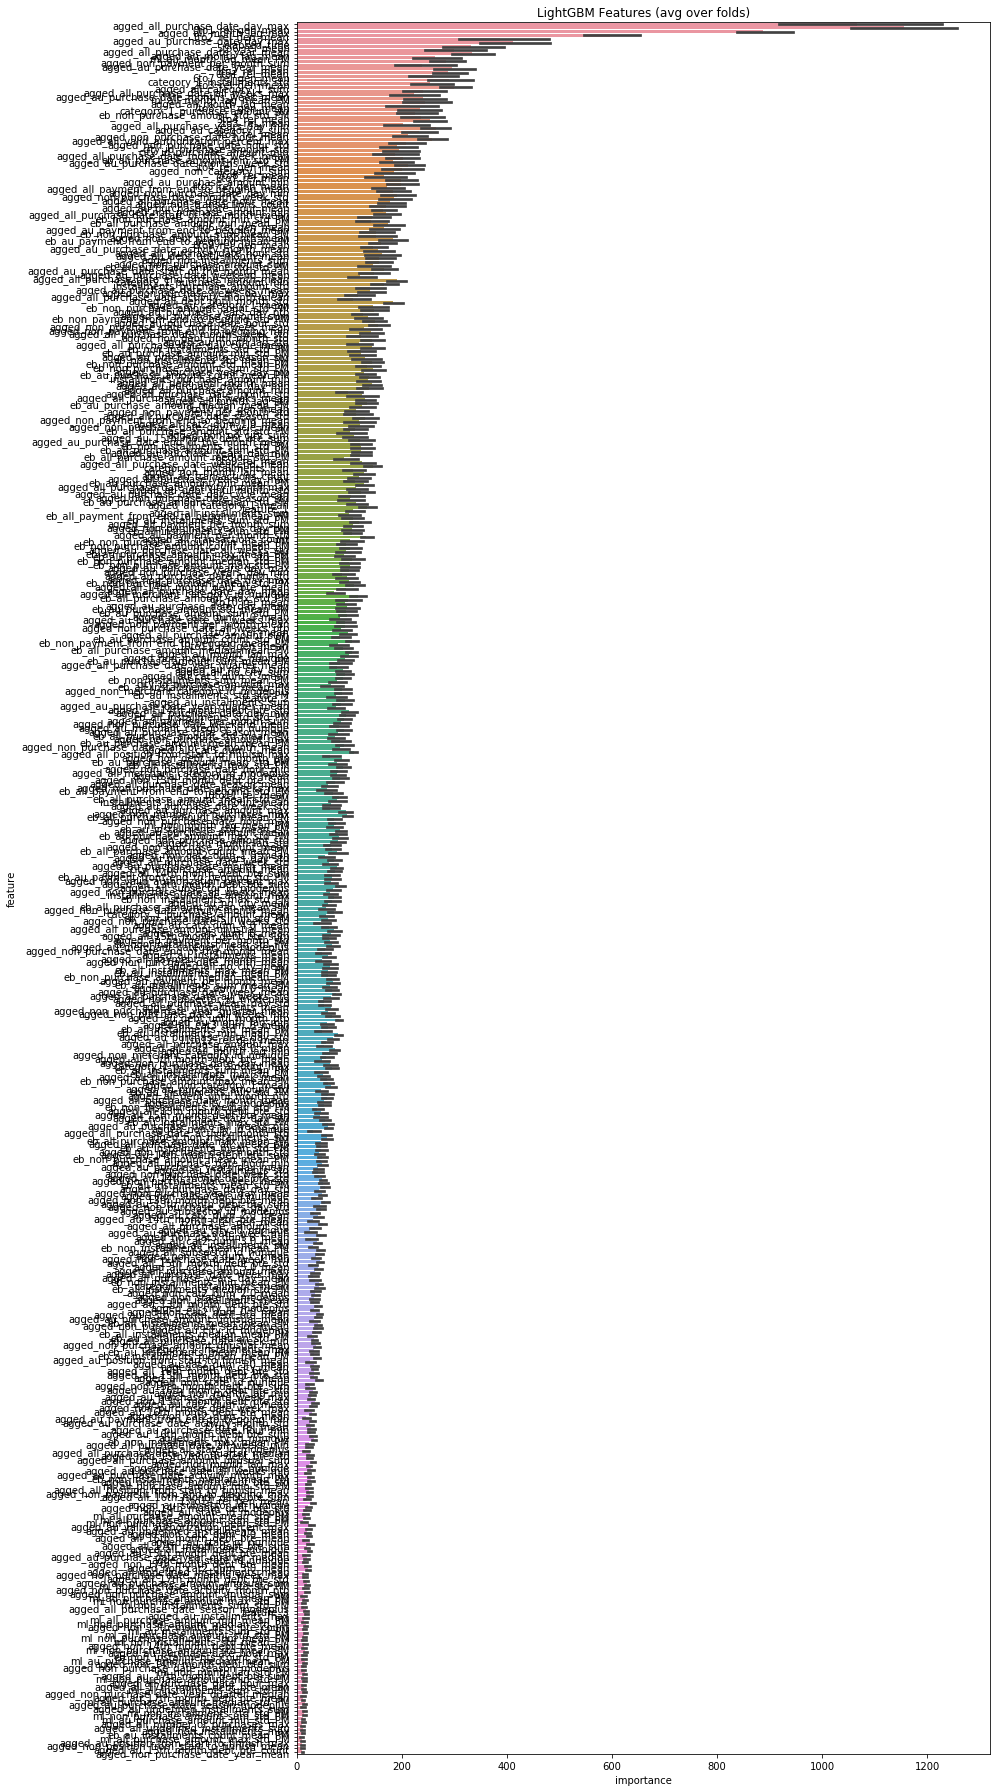

In [38]:
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,25))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

In [39]:
sub_df = pd.DataFrame({"card_id":test["card_id"].values})
sub_df["target"] = predictions
sub_df.to_csv("submit_lgb.csv", index=False)

sub_df1 = pd.DataFrame({"card_id":test["card_id"].values})
sub_df1["target"] = predictions_lgb
sub_df1.to_csv("submit_lgb1.csv", index=False)

## Stacking

In [40]:
train_stack = np.vstack([oof,oof_lgb]).transpose()
test_stack = np.vstack([predictions,predictions_lgb]).transpose()

folds = RepeatedKFold(n_splits=5,n_repeats=1,random_state=4520)
oof_stack = np.zeros(train_stack.shape[0])
predictions_stack = np.zeros(test_stack.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_stack, target)):
    print("fold n°{}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], target.iloc[trn_idx].values
    val_data, val_y = train_stack[val_idx], target.iloc[val_idx].values

    print("-" * 10 + "Stacking " + str(fold_) + "-" * 10)
#     cb_model = CatBoostRegressor(iterations=3000, learning_rate=0.1, depth=8, l2_leaf_reg=20, bootstrap_type='Bernoulli',  eval_metric='RMSE', metric_period=50, od_type='Iter', od_wait=45, random_seed=17, allow_writing_files=False)
#     cb_model.fit(trn_data, trn_y, eval_set=(val_data, val_y), cat_features=[], use_best_model=True, verbose=True)
    clf = BayesianRidge()
    clf.fit(trn_data, trn_y)
    
    oof_stack[val_idx] = clf.predict(val_data)
    predictions_stack += clf.predict(test_stack) / 5


np.sqrt(mean_squared_error(target.values, oof_stack))

fold n°0
----------Stacking 0----------


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


fold n°1
----------Stacking 1----------
fold n°2
----------Stacking 2----------
fold n°3
----------Stacking 3----------
fold n°4
----------Stacking 4----------


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

3.685101972615368

In [42]:
sample_submission = pd.read_csv('data\\sample_submission.csv')
sample_submission['target'] = predictions_stack
sample_submission.to_csv('Bayesian_Ridge_Stacking.csv', index=False)

In [ ]:
sample_submission = pd.read_csv('data\\sample_submission.csv')
sample1 = pd.read_csv("../input/elo-blending/3.695.csv")
sample2 = pd.read_csv("../input/elo-blending/combining_submission (1).csv")
sample_submission['target'] = predictions * 0.5 + predictions_lgb * 0.5
sample_submission.to_csv("Blend1.csv", index = False)
sample_submission['target'] = sample_submission['target'] * 0.2 + sample1['target'] * 0.2 + sample2['target'] * 0.6
sample_submission.to_csv('Blend2.csv', index=False)